In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from minepy import MINE

import csv


In [2]:
'''定义两个差分方程https://skccm.readthedocs.io/en/latest/quick-example.html
论文Distinguishing time-delayed causal interactions using convergent cross mapping
'''
def coupled_logistic(rx1, rx2, b12, b21, time,ts_length):
    x1 = np.zeros(ts_length)
    x2 = np.zeros(ts_length)
    
    x1[0] = 0.2
    x2[0] = 0.4

    for i in range(ts_length-1):

        x1[i+1] = x1[i] * (rx1 - rx1 * x1[i] - b21 * x2[i])
        x2[i+1] = x2[i] * (rx2 - rx2 * x2[i] - b12 * x1[i-time])

    return x1,x2
#式中，time是x1对x2影响的时间延迟

获得时滞数据

In [3]:
rx1 = 3.78 #决定了x1序列的混沌行为
rx2 = 3.77 #determines chaotic behavior of the x2 series
b12 = 0.2 #Influence of x1 on x2
b21 = 0.07 #Influence of x2 on x1
time = 4#time是x1对x2影响的时间延迟
ts_length = 1000
x1,x2 = coupled_logistic(rx1,rx2,b12,b21,time,ts_length)

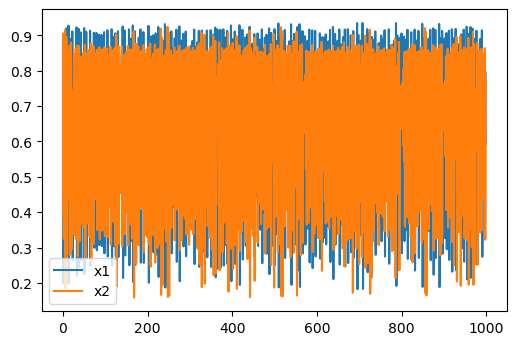

In [4]:
plt.figure(1,dpi=100)

plt.plot(x1,label = "x1")
plt.plot(x2,label = "x2")
plt.legend()
plt.show()

构建x1时间延迟数据集

In [5]:
#array改为dataframe
x_1 = pd.DataFrame(x1,columns=['x_1'])
x_2 = pd.DataFrame(x2,columns=['x_2'])
x_1.shape

(1000, 1)

In [6]:
x_2 = x_2.iloc[10:800,[0]]#原始数据
x_2 = x_2.reset_index(drop=True)#更改索引
x_2.columns=['x_2']#重命名列名
x_t = x_1.iloc[10:800,[0]]#原始数据
x_t = x_t.reset_index(drop=True)#更改索引
x_t.columns=['x_1']#重命名列名


x_t1 = x_1.iloc[9:799,[0]]
x_t1 = x_t1.reset_index(drop=True)#更改索引
x_t1.columns=['x_t1']#重命名列名

x_t2 = x_1.iloc[8:798,[0]]
x_t2 = x_t2.reset_index(drop=True)#更改索引
x_t2.columns=['x_t2']#重命名列名
x_t3 = x_1.iloc[7:797,[0]]
x_t3 = x_t3.reset_index(drop=True)#更改索引
x_t3.columns=['x_t3']#重命名列名
x_t4 = x_1.iloc[6:796,[0]]
x_t4 = x_t4.reset_index(drop=True)#更改索引
x_t4.columns=['x_t4']#重命名列名
x_t5 = x_1.iloc[5:795,[0]]
x_t5 = x_t5.reset_index(drop=True)#更改索引
x_t5.columns=['x_t5']#重命名列名
x_t6 = x_1.iloc[4:794,[0]]
x_t6 = x_t6.reset_index(drop=True)#更改索引
x_t6.columns=['x_t6']#重命名列名
x_t7 = x_1.iloc[3:793,[0]]
x_t7 = x_t7.reset_index(drop=True)#更改索引
x_t7.columns=['x_t7']#重命名列名
x_t8 = x_1.iloc[2:792,[0]]
x_t8 = x_t8.reset_index(drop=True)#更改索引
x_t8.columns=['x_t8']#重命名列名
x_t9 = x_1.iloc[1:791,[0]]
x_t9 = x_t9.reset_index(drop=True)#更改索引
x_t9.columns=['x_t9']#重命名列名
x_t10 = x_1.iloc[0:790,[0]]
x_t10 = x_t10.reset_index(drop=True)#更改索引
x_t10.columns=['x_t10']#重命名列名

data =  pd.concat([x_2,x_t,x_t1,x_t2,x_t3,x_t4,x_t5,\
                   x_t6,x_t7,x_t8,x_t9,x_t10],axis=1)

data

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
0,0.582674,0.649620,0.221910,0.919597,0.537449,0.824049,0.337911,0.889498,0.408160,0.869851,0.599200,0.200000
1,0.820701,0.833885,0.649620,0.221910,0.919597,0.537449,0.824049,0.337911,0.889498,0.408160,0.869851,0.599200
2,0.466541,0.475703,0.833885,0.649620,0.221910,0.919597,0.537449,0.824049,0.337911,0.889498,0.408160,0.869851
3,0.852474,0.927233,0.475703,0.833885,0.649620,0.221910,0.919597,0.537449,0.824049,0.337911,0.889498,0.408160
4,0.436290,0.199713,0.927233,0.475703,0.833885,0.649620,0.221910,0.919597,0.537449,0.824049,0.337911,0.889498
...,...,...,...,...,...,...,...,...,...,...,...,...
785,0.236235,0.389760,0.864395,0.626905,0.768448,0.290164,0.899624,0.575535,0.191834,0.934245,0.468534,0.835085
786,0.666504,0.892617,0.389760,0.864395,0.626905,0.768448,0.290164,0.899624,0.575535,0.191834,0.934245,0.468534
787,0.735548,0.320676,0.892617,0.389760,0.864395,0.626905,0.768448,0.290164,0.899624,0.575535,0.191834,0.934245
788,0.641106,0.806935,0.320676,0.892617,0.389760,0.864395,0.626905,0.768448,0.290164,0.899624,0.575535,0.191834


相关性分析

In [7]:
#pearson相关系数
r = data.corr()
r

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.044225,0.029379,-0.006529,0.018031,-0.014932,-0.017591,-0.044058,0.189477,-0.227455,0.238485,-0.316353
x_1,-0.044225,1.000000,-0.708518,0.471693,-0.386506,0.256482,-0.140895,0.062851,0.007630,-0.059681,0.070970,-0.079588
x_t1,0.029379,-0.708518,1.000000,-0.709088,0.471631,-0.387114,0.258611,-0.142688,0.065278,0.005457,-0.059989,0.076286
x_t2,-0.006529,0.471693,-0.709088,1.000000,-0.708957,0.471742,-0.387846,0.259218,-0.144095,0.066271,0.006588,-0.064028
x_t3,0.018031,-0.386506,0.471631,-0.708957,1.000000,-0.708527,0.470833,-0.387127,0.259856,-0.143828,0.063540,0.010024
x_t4,-0.014932,0.256482,-0.387114,0.471742,-0.708527,1.000000,-0.708293,0.470669,-0.387939,0.260085,-0.142070,0.059820
x_t5,-0.017591,-0.140895,0.258611,-0.387846,0.470833,-0.708293,1.000000,-0.708409,0.471935,-0.388597,0.258394,-0.136443
x_t6,-0.044058,0.062851,-0.142688,0.259218,-0.387127,0.470669,-0.708409,1.000000,-0.709156,0.472365,-0.387477,0.253682
x_t7,0.189477,0.007630,0.065278,-0.144095,0.259856,-0.387939,0.471935,-0.709156,1.000000,-0.709623,0.472895,-0.383545
x_t8,-0.227455,-0.059681,0.005457,0.066271,-0.143828,0.260085,-0.388597,0.472365,-0.709623,1.000000,-0.709640,0.468480


In [8]:
#spearman秩相关
s = data.corr('spearman')
s

,x_2,x_1,x_t1,x_t2,x_t3,x_t4,x_t5,x_t6,x_t7,x_t8,x_t9,x_t10
x_2,1.000000,-0.045835,0.032771,-0.008466,0.013686,-0.006349,-0.019568,-0.049958,0.183644,-0.220803,0.234803,-0.319382
x_1,-0.045835,1.000000,-0.787629,0.519527,-0.403413,0.280028,-0.156346,0.066957,0.004528,-0.052132,0.071885,-0.080195
x_t1,0.032771,-0.787629,1.000000,-0.787629,0.519939,-0.404080,0.280911,-0.157474,0.068500,0.002784,-0.052104,0.076401
x_t2,-0.008466,0.519527,-0.787629,1.000000,-0.788039,0.520603,-0.404944,0.282023,-0.158872,0.070082,0.002665,-0.056560
x_t3,0.013686,-0.403413,0.519939,-0.788039,1.000000,-0.788040,0.520287,-0.404441,0.282402,-0.159053,0.068557,0.006331
x_t4,-0.006349,0.280028,-0.404080,0.520603,-0.788040,1.000000,-0.787748,0.519844,-0.404691,0.282432,-0.157744,0.064901
x_t5,-0.019568,-0.156346,0.280911,-0.404944,0.520287,-0.787748,1.000000,-0.787750,0.519654,-0.404603,0.281821,-0.153342
x_t6,-0.049958,0.066957,-0.157474,0.282023,-0.404441,0.519844,-0.787750,1.000000,-0.787534,0.519551,-0.404223,0.277421
x_t7,0.183644,0.004528,0.068500,-0.158872,0.282402,-0.404691,0.519654,-0.787534,1.000000,-0.787723,0.520501,-0.401214
x_t8,-0.220803,-0.052132,0.002784,0.070082,-0.159053,0.282432,-0.404603,0.519551,-0.787723,1.000000,-0.788467,0.517109


In [9]:
#MIC最大信息系数
list(data)
MIC = []
for var1 in list(data):
        x = data[var1]
        y = data['x_2']
        mine = MINE(alpha = 0.6, c = 15)
        mine.compute_score(x, y)
        MIC.append(mine.mic())
        print(mine.mic())

1.0000000000000002
0.17991325571367903
0.19400114741634186
0.21698929601217024
0.24207516113260025
0.28021412218870484
0.29584717475665595
0.30629074861068933
0.2911048273229906
0.2896693329292385
0.29021696871629027
0.29291576036076444


In [10]:
rx2 = r.x_2.reset_index(drop=True)#更改索引
rx2 = rx2.iloc[1:12]
rx2 = rx2.reset_index(drop=True)

sx2 = s.x_2.reset_index(drop=True)#更改索引
sx2 = sx2.iloc[1:12]
sx2 = sx2.reset_index(drop=True)

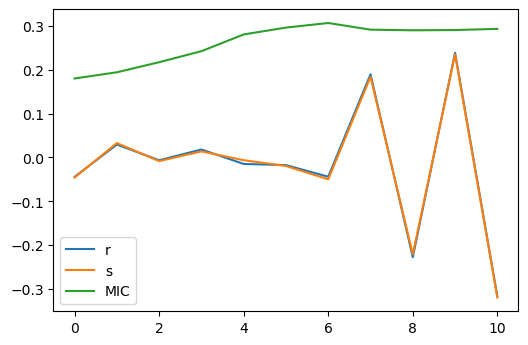

In [11]:
plt.figure(1,dpi=100)

plt.plot(rx2,label = "r")
plt.plot(sx2,label = "s")
plt.plot(MIC[1:12],label = "MIC")
plt.legend()
plt.show()